In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,nltk

In [2]:
data =pd.read_excel('../data/Hate_speech.xlsx')
data.head()

,Sentence,Label,Unnamed: 2
0,অতীতে দেখা গেছে ছাত্রলীগের নাম ব্যবহার করে অন...,4,NaN
1,"অশিক্ষিত, মূর্খ, হিরোন্চি দোকানী গুলার",3,NaN
2,অসভ্য কোথাকার।আমার তো মনে হয় তোর পেট থেকে মান...,3,NaN
3,আওয়ামী লীগের পুন মারি,4,NaN
4,আমেরিকা অশ্রু বিক্রি করে পয়সা কামাই তে ছে।বিচ...,2,NaN


In [3]:
data.drop(columns={'Unnamed: 2'},axis=1,inplace=True)
data.groupby('Label').size().reset_index(name='counts')

,Label,counts
0,0,1305
1,1,883
2,2,1040
3,3,1281
4,4,1410
5,5,1259


In [4]:
data['Label'].replace([0,1,2,3,4,5],['Celebrity','Gender Abuse','International','Personal','Political','Religious'],inplace=True)
data.groupby('Label').size().reset_index(name='counts')

,Label,counts
0,Celebrity,1305
1,Gender Abuse,883
2,International,1040
3,Personal,1281
4,Political,1410
5,Religious,1259


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7178 entries, 0 to 7177
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  7178 non-null   object
 1   Label     7178 non-null   object
dtypes: object(2)
memory usage: 112.3+ KB


<AxesSubplot:xlabel='Label', ylabel='count'>

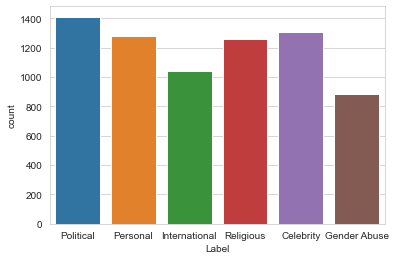

In [6]:
sns.set_style('whitegrid')
sns.countplot(x = 'Label', data = data)

In [7]:
def process_sentences(Sentence): 
    Sentence = re.sub('[^\u0980-\u09FF]',' ',Sentence)
    Sentence = re.sub('[?.`*^()!°¢܌Ͱ̰ߒנ~×Ҡߘ:ҰߑÍ|।;!,&%\'@#$><A-Za-z0+-9=./''""_০-৯]', '', Sentence)
    Sentence = re.sub(r'(\W)(?=\1)', '', Sentence)
    Sentence = re.sub(r'https?:\/\/.*[\r\n]*', '', Sentence, flags=re.MULTILINE)
    Sentence = re.sub(r'\<a href', ' ', Sentence)
    Sentence = re.sub(r'&amp;', '', Sentence) 
    Sentence = re.sub(r'<br />', ' ', Sentence)
    Sentence = re.sub(r'\'', ' ', Sentence)
    Sentence = re.sub(r'ߑͰߑ̰ߒנ', '', Sentence)
    Sentence = re.sub(r'ߎɰߎɰߎɍ', '', Sentence)
    return Sentence

In [8]:
data['Sentence'] = data['Sentence'].apply(process_sentences)  
data

,Sentence,Label
0,অতীতে দেখা গেছে ছাত্রলীগের নাম ব্যবহার করে অন...,Political
1,অশিক্ষিত মূর্খ হিরোন্চি দোকানী গুলার,Personal
2,অসভ্য কোথাকার আমার তো মনে হয় তোর পেট থেকে মান...,Personal
3,আওয়ামী লীগের পুন মারি,Political
4,আমেরিকা অশ্রু বিক্রি করে পয়সা কামাই তে ছে বিচ...,International
...,...,...
7173,তুই কেমনে জানলি ঔ নেতা আওয়ামীগ থেকে বহিষ্কৃত দ...,Political
7174,তুই কোন কথা বলিস নাস্তিকের বাচ্চা তোর মত নাস্ত...,Religious
7175,তুই কৌশলে ভোট ডাকাতিকে জাস্টিফাই করছস গণধর্ষণে...,Celebrity
7176,তুই ক্যাপশনটাই তো ঠিক করে লিখতে পারলি না নাটকে...,Gender Abuse


In [9]:
# Remove the Text with least words
data['length'] = data['Sentence'].apply(lambda x:len(x.split()))
dataset = data.loc[data.length>0]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Text".format(len(data)-len(dataset)),
      "\nTotal Text:",len(dataset))

After Cleaning: 
Removed 0 Small Text 
Total Text: 7178


In [10]:
dataset

,Sentence,Label,length
0,অতীতে দেখা গেছে ছাত্রলীগের নাম ব্যবহার করে অন...,Political,31
1,অশিক্ষিত মূর্খ হিরোন্চি দোকানী গুলার,Personal,5
2,অসভ্য কোথাকার আমার তো মনে হয় তোর পেট থেকে মান...,Personal,15
3,আওয়ামী লীগের পুন মারি,Political,4
4,আমেরিকা অশ্রু বিক্রি করে পয়সা কামাই তে ছে বিচ...,International,15
...,...,...,...
7173,তুই কেমনে জানলি ঔ নেতা আওয়ামীগ থেকে বহিষ্কৃত দ...,Political,10
7174,তুই কোন কথা বলিস নাস্তিকের বাচ্চা তোর মত নাস্ত...,Religious,16
7175,তুই কৌশলে ভোট ডাকাতিকে জাস্টিফাই করছস গণধর্ষণে...,Celebrity,18
7176,তুই ক্যাপশনটাই তো ঠিক করে লিখতে পারলি না নাটকে...,Gender Abuse,17


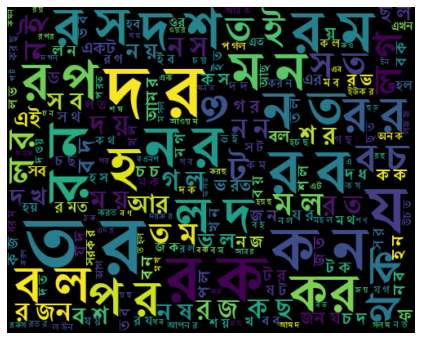

In [11]:
from wordcloud import WordCloud 
allWords = ' '.join([comnt for comnt in data['Sentence']])
wordCloud = WordCloud(font_path='../ShonarBangla/Shonarb.ttf', width =500, height =400, random_state = 21, max_font_size = 119).generate(allWords)

fig = plt.figure(1, figsize=(10, 6))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [12]:
def data_summary(dataset):

    documents = []
    words = []
    u_words = []
    vocab_size = []
    total_u_words = [word.strip().lower() for t in list(dataset.Sentence) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Label.value_counts().to_dict().items()]
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.Label==label].Sentence) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        documents.append(len(list(dataset[dataset.Label==label].Sentence)))
        words.append(len(word_list))
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Label==label].Sentence))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
    vocab_size = (len(np.unique(total_u_words)))
    
    return documents,words,u_words,class_label,vocab_size

documents,words,u_words,class_names,vocab_size = data_summary(dataset)   


Class Name :  Political
Number of Documents:1410
Number of Words:16350
Number of Unique Words:4206
Most Frequent Words:

না	253
করে	200
এই	162
আর	161
কাদের	123
সরকার	112
কি	109
কথা	100
লীগ	92
ও	90

Class Name :  Celebrity
Number of Documents:1305
Number of Words:13710
Number of Unique Words:2978
Most Frequent Words:

না	206
আর	149
করে	131
কে	120
একটা	115
এই	102
কি	97
তো	78
তুই	75
ভালো	71

Class Name :  Personal
Number of Documents:1281
Number of Words:10629
Number of Unique Words:3088
Most Frequent Words:

না	192
এই	112
করে	109
কি	95
আর	79
হয়	77
ভালো	69
একটা	66
সব	61
তো	60

Class Name :  Religious
Number of Documents:1259
Number of Words:12556
Number of Unique Words:2669
Most Frequent Words:

না	143
তুই	141
কি	123
এই	114
করে	109
ধর্ম	108
মালাউন	100
আর	98
বাচ্চা	90
তোর	86

Class Name :  International
Number of Documents:1040
Number of Words:14019
Number of Unique Words:1763
Most Frequent Words:

না	230
ভারত	149
এই	142
করে	134
ভারতের	126
ও	123
আর	123
জন্য	102
যুদ্ধ	98
আমেরিকা	90

Class 

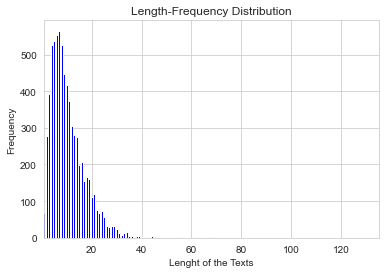

Maximum Length of a Text: 78
Minimum Length of a Text: 1
Average Length of a Text: 11.0


In [13]:
# Calculate the Text of each of the Text
dataset['TextLength'] = dataset.Sentence.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.TextLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a Text: {max(dataset.TextLength)}")
print(f"Minimum Length of a Text: {min(dataset.TextLength)}")
print(f"Average Length of a Text: {round(np.mean(dataset.TextLength),0)}")

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=vocab_size, ngram_range=(1, 1), max_df=1.0, min_df=1)
feature = cv.fit_transform(data['Sentence']).toarray()

In [15]:
feature_names = cv.get_feature_names()
print("Number of feature: {}".format(len(feature_names)))
print("Features: {}".format(feature_names))

Number of feature: 1558
Features: ['অই', 'অইগ', 'অক', 'অগ', 'অঙ', 'অচ', 'অচল', 'অজ', 'অজগর', 'অজপ', 'অঞ', 'অট', 'অত', 'অতএব', 'অথচ', 'অথব', 'অদ', 'অধ', 'অধপথ', 'অধমদ', 'অন', 'অনন', 'অনব', 'অনভ', 'অপ', 'অপক', 'অপকর', 'অপচ', 'অপদ', 'অপপ', 'অপব', 'অপম', 'অপর', 'অপয়', 'অফ', 'অব', 'অবক', 'অবগত', 'অবত', 'অবদ', 'অবধ', 'অবম', 'অবলম', 'অবশ', 'অবশত', 'অবস', 'অভ', 'অভদ', 'অম', 'অয', 'অযথ', 'অর', 'অরজ', 'অল', 'অলর', 'অলস', 'অশ', 'অশন', 'অষ', 'অস', 'অসচ', 'অসন', 'অসভ', 'অসম', 'অসময়', 'অসহ', 'অহ', 'আআআনক', 'আই', 'আইক', 'আইকন', 'আইছ', 'আইট', 'আইন', 'আইনশ', 'আইব', 'আইস', 'আইসক', 'আইয়', 'আউল', 'আওঅম', 'আওত', 'আওব', 'আওম', 'আওমল', 'আওয', 'আওল', 'আওয়', 'আক', 'আকর', 'আখ', 'আখড', 'আখত', 'আগ', 'আগতদ', 'আগন', 'আগমন', 'আগর', 'আগরতল', 'আঘ', 'আঙ', 'আচ', 'আচরণ', 'আচল', 'আছ', 'আজ', 'আজও', 'আজক', 'আজন', 'আজব', 'আজর', 'আঞ', 'আট', 'আটক', 'আটরস', 'আড', 'আত', 'আদ', 'আদর', 'আধ', 'আন', 'আনচ', 'আনছ', 'আনত', 'আনন', 'আনফল', 'আনব', 'আনল', 'আপ', 'আপদ', 'আপন', 'আপল', 'আফ', 'আফগ', 'আফন', 'আফস', 'আব', 'আবর', 'আবল', 'আম', 'আমগ',

In [16]:
cv.vocabulary_

{'অত': 12,
 'রল': 1294,
 'যবহ': 1220,
 'কর': 524,
 'অন': 20,
 'ষড়যন': 1402,
 'পর': 984,
 'ধর': 889,
 'হয়': 1521,
 'জন': 700,
 'উঠ': 271,
 'কখনও': 478,
 'সফল': 1436,
 'হব': 1507,
 'অশ': 56,
 'অসভ': 62,
 'আম': 139,
 'মন': 1150,
 'ছচ': 671,
 'আওয়': 87,
 'পয়স': 1012,
 'হওয়': 1492,
 'দরক': 860,
 'সক': 1409,
 'ইসল': 248,
 'সব': 1437,
 'মই': 1123,
 'এই': 321,
 'শট': 1357,
 'উনর': 286,
 'ফল': 1024,
 'খত': 564,
 'একট': 346,
 'তর': 815,
 'বধ': 1056,
 'উন': 281,
 'নক': 902,
 'এখন': 363,
 'উচ': 264,
 'রজ': 1252,
 'ইহ': 249,
 'এদ': 382,
 'এক': 338,
 'সরক': 1462,
 'মত': 1140,
 'রক': 1240,
 'নত': 919,
 'জর': 718,
 'আর': 146,
 'কট': 487,
 'কটক': 488,
 'রত': 1260,
 'এব': 389,
 'উয়': 318,
 'লন': 1329,
 'আপন': 130,
 'সহ': 1470,
 'ওয়': 460,
 'গল': 612,
 'বল': 1072,
 'তম': 813,
 'চট': 644,
 'খক': 557,
 'লই': 1306,
 'রদ': 1270,
 'চলত': 661,
 'জম': 716,
 'অবস': 45,
 'শত': 1358,
 'বলল': 1079,
 'এমন': 392,
 'হস': 1518,
 'য়ন': 1549,
 'হইছ': 1479,
 'সলম': 1468,
 'নদ': 920,
 'নয': 932,
 'এট': 370,
 'শয়ত': 1379,
 

In [17]:
#Label Encoding Function 
from sklearn.preprocessing import LabelEncoder

def label_encoding(sentiment,bool):

    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) 
    class_names =le.classes_ 
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels

In [18]:
from sklearn.model_selection import train_test_split

labels = label_encoding(dataset.Label,False)

X_train, X_test, y_train, y_test = train_test_split(feature, labels, test_size = 0.20, random_state = 0)

In [19]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())
count_df.head()

,অই,অইগ,অক,অগ,অঙ,অচ,অচল,অজ,অজগর,অজপ,...,য়দ,য়ন,য়বদ,য়ম,য়র,য়ল,য়স,য়য়,য়৷,ৱণ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score

In [22]:
def model_defination():
    lr_model = LogisticRegression(random_state = 123, max_iter = 10000)
    dt_model = DecisionTreeClassifier(criterion = 'gini', random_state = 0, max_depth = 1, min_samples_split = 25)
    rf_model = RandomForestClassifier(criterion ='entropy', random_state = 13)
    mnb_model = MultinomialNB(alpha=0.431)
    knn_model = KNeighborsClassifier(n_neighbors=100, metric = 'minkowski', algorithm = 'ball_tree', n_jobs = 10)
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    sgd_model = SGDClassifier(loss ='log',penalty='l2', max_iter=5)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM','SGD']
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model,sgd_model]
    return ml_models,model_names

In [23]:
def model_performace(model,X_train,X_test,y_train,y_test):

    my_dict = {}
    model.fit(X_train,y_train)
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100 
    my_dict['Precision'] = round(precision_score(y_test, pred_y,average='micro'),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y,average='micro'),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y,average='micro'),4)*100 
    
    return my_dict  

In [24]:
import pandas as pd
def performance_table(performance_dict):

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list},
                                  index =['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM','SGD'])
    performance_df.style.highlight_max(color = 'lightgreen', axis = 0)
    return performance_df

In [25]:
path = "../json/Hate Speech/"

In [26]:
import json

ml_models,model_names = model_defination()
accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
with open(path+f'ml_performance_bow.json', 'w') as f:
      json.dump(accuracy, f)

C:\Users\afrim\.conda\envs\tensorflow1\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [27]:
accuracy1 = json.load(open('../json/Hate Speech/ml_performance_bow.json'))
table = performance_table(accuracy1)
table

,Accuracy,Precision,Recall,F1 Score
LR,65.74,65.74,65.74,65.74
DT,25.77,25.77,25.77,25.77
RF,77.02,77.02,77.02,77.02
MNB,61.28,61.28,61.28,61.28
KNN,29.46,29.46,29.46,29.46
Linear SVM,61.91,61.91,61.91,61.91
RBF SVM,63.51,63.51,63.51,63.51
SGD,63.23,63.23,63.23,63.23


In [28]:
print(f"Highest Accuracy achieved by {table.Accuracy.idxmax(axis = 0)} at = {max(table.Accuracy)}")
print(f"Highest F1-Score achieved by {table['F1 Score'].idxmax(axis = 0)} at = {max(table['F1 Score'] )}")
print(f"Highest Precision Score achieved by {table['Precision'].idxmax(axis = 0)} at = {max(table['Precision'] )}")
print(f"Highest Recall Score achieved by {table['Recall'].idxmax(axis = 0)} at = {max(table['Recall'] )}")

Highest Accuracy achieved by RF at = 77.02
Highest F1-Score achieved by RF at = 77.02
Highest Precision Score achieved by RF at = 77.02
Highest Recall Score achieved by RF at = 77.02


In [29]:
classifier1 = RandomForestClassifier(criterion ='entropy', random_state = 13)
classifier1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=13)

In [30]:
y_pred = classifier1.predict(X_test)
y_pred[:50]

array([0, 3, 1, 5, 5, 4, 2, 2, 5, 0, 4, 0, 3, 5, 1, 4, 0, 1, 4, 2, 2, 0,
       1, 0, 4, 3, 3, 4, 2, 4, 3, 2, 3, 4, 1, 0, 4, 4, 3, 0, 0, 5, 5, 3,
       3, 2, 4, 0, 3, 3])

In [31]:
print(f"Train Accuracy is: {round(classifier1.score(X_train, y_train)*100,2)}%")
print(f"Test Accuracy is : {round(classifier1.score(X_test, y_test)*100,2)}%")

Train Accuracy is: 94.86%
Test Accuracy is : 77.02%


In [32]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       275
           1       0.81      0.93      0.87       162
           2       0.83      0.98      0.90       195
           3       0.58      0.63      0.60       243
           4       0.81      0.61      0.69       305
           5       0.84      0.82      0.83       256

    accuracy                           0.77      1436
   macro avg       0.77      0.79      0.78      1436
weighted avg       0.77      0.77      0.77      1436



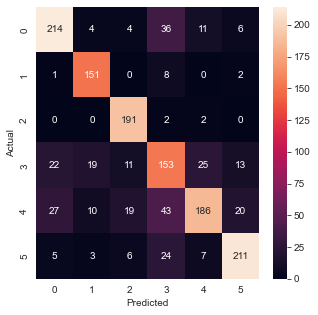

In [33]:
conf_mat = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()